#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
import matplotlib as mpl

In [2]:
import tensorflow as tf
from tensorflow import keras

#### Importing Dataset

In [3]:
digit_mnist = keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test) = digit_mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


#### Normalising data and Splitting into train/validation/test sets

In [4]:
X_train_n = X_train_full/255.
X_test_n = X_test/255.

In [5]:
X_valid, X_train = X_train_n[:6000], X_train_n[6000:]
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]
X_test = X_test_n

#### Creating Model Architecture

In [6]:
np.random.seed(1)
tf.random.set_seed(1)

In [7]:
model = keras.models.Sequential()

In [8]:
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(200, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


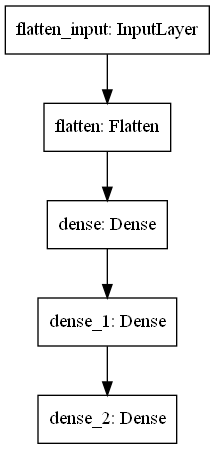

In [10]:
import pydotplus
keras.utils.plot_model(model)

#### Compiling the Model

In [11]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

In [12]:
model_history = model.fit(X_train, y_train, epochs = 60, validation_data = (X_valid, y_valid))

Epoch 1/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.6158 - accuracy: 0.8384 - val_loss: 0.3167 - val_accuracy: 0.9113
Epoch 2/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2999 - accuracy: 0.9149 - val_loss: 0.2535 - val_accuracy: 0.9293
Epoch 3/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2493 - accuracy: 0.9285 - val_loss: 0.2150 - val_accuracy: 0.9407
Epoch 4/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2152 - accuracy: 0.9394 - val_loss: 0.1886 - val_accuracy: 0.9478
Epoch 5/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1887 - accuracy: 0.9465 - val_loss: 0.1721 - val_accuracy: 0.9532
Epoch 6/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1676 - accuracy: 0.9521 - val_loss: 0.1531 - val_accuracy: 0.9567
Epoch 7/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1506 - accuracy: 0.9573 - val_loss: 0.1462 - val_accuracy:

In [13]:
model_history.params

{'verbose': 1, 'epochs': 60, 'steps': 1688}

In [14]:
model_history.history

{'loss': [0.6158332824707031,
  0.2998518645763397,
  0.24930748343467712,
  0.21523824334144592,
  0.18870586156845093,
  0.16762642562389374,
  0.15056189894676208,
  0.1364239603281021,
  0.12459580600261688,
  0.1142762079834938,
  0.10579328238964081,
  0.09784139692783356,
  0.09100057184696198,
  0.08546909689903259,
  0.08001455664634705,
  0.07485638558864594,
  0.0703800693154335,
  0.06616845726966858,
  0.062269896268844604,
  0.05892953649163246,
  0.05549047514796257,
  0.05234096571803093,
  0.049688149243593216,
  0.04674360156059265,
  0.04448295384645462,
  0.04208330437541008,
  0.04032822325825691,
  0.03776487708091736,
  0.03588927909731865,
  0.03407645970582962,
  0.03243562579154968,
  0.030853481963276863,
  0.029066385701298714,
  0.02773684822022915,
  0.026516208425164223,
  0.025074489414691925,
  0.023833753541111946,
  0.02268228307366371,
  0.021676721051335335,
  0.020670460537075996,
  0.01956712082028389,
  0.01870845817029476,
  0.017764026299118996

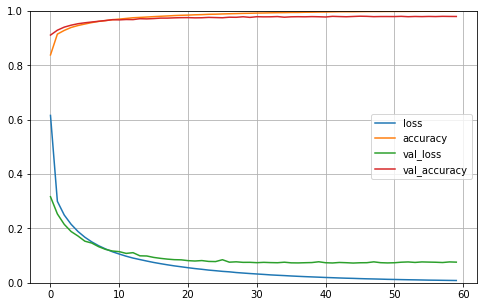

In [15]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

#### Evaluating the Model

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0760 - accuracy: 0.9791


[0.07602811604738235, 0.9790999889373779]

#### Prediction

In [17]:
X_new = X_test[:5]

In [18]:
y_pred = np.argmax(model.predict(X_new), axis = -1)
y_pred

array([7, 2, 1, 0, 4], dtype=int64)

#### Verfication

AxesImage(54,36;334.8x217.44)


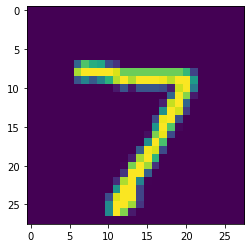

In [19]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


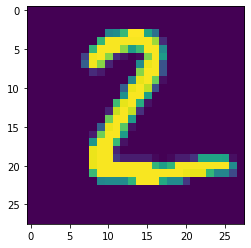

In [20]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


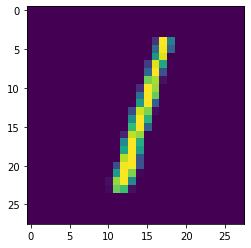

In [21]:
print(plt.imshow(X_test[2]))

AxesImage(54,36;334.8x217.44)


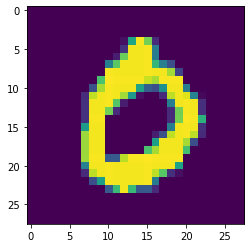

In [22]:
print(plt.imshow(X_test[3]))

AxesImage(54,36;334.8x217.44)


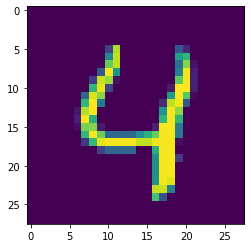

In [23]:
print(plt.imshow(X_test[4]))